In [9]:
import numpy as np
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")


from sklearn.model_selection import train_test_split

In [2]:
fake_news = pd.read_csv("1mio-raw.csv/1mio-raw.csv", delimiter = ',', encoding="utf-8")

c:\Users\jakob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
fake = fake_news[:100000]

In [49]:
n_words_fake = [m for m in map(lambda x: len(x.split(" ")), fake_df["content"])]
n_words_reliable = [m for m in map(lambda x: len(x.split(" ")), real_df["content"])]
n_words_wiki  = [m for m in map(lambda x: len(x.split(" ")), wikinews["content"])]

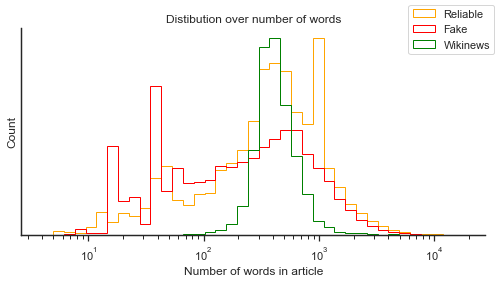

In [65]:
fig, ax = plt.subplots(figsize = (7,4))

maxx, minn = np.log10(max(n_words_fake)), np.log10(min(n_words_fake))

ax.hist(n_words_reliable, bins = np.logspace(minn,maxx,40),  histtype = "step", color = "orange", label = "Reliable")
ax.hist(n_words_fake, bins = np.logspace(minn,maxx,40),  histtype = "step", color = "red", label = "Fake")
ax.set_xscale("log")
sns.despine()
ax.set_title("Distibution over number of words")
ax.set_xlabel("Number of words in article")
ax.set_ylabel("Count")
ax.set_yticks([])
ax2 = ax.twinx() 
ax2.hist(n_words_wiki, bins = np.logspace(minn,maxx,40),  histtype = "step", color = "green", label = "Wikinews", )

ax2.set_yticks([])

fig.legend()
sns.despine()
fig.tight_layout()
plt.show()

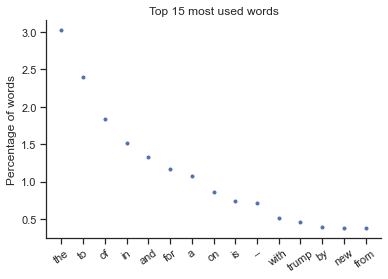

In [131]:
# fake = fake_news[:100000]


words_in_titles = [m for m in map(lambda x: str(x).split(" "), fake["title"])]
words_in_titles = [j.lower() for sub in words_in_titles for j in sub]

w, counts = np.unique(words_in_titles, return_counts = True)

asort = np.argsort(counts)[::-1]

plt.plot(w[asort][:15], counts[asort][:15]/sum(counts)*100,'.')

plt.xticks(rotation = 35)

sns.despine()

plt.title("Top 15 most used words")
plt.ylabel("Percentage of words")

plt.show()


In [29]:
wikinews = pd.read_csv("wikinewsdata.csv")

In [31]:
wikinews.rename(columns = {'Content':'content', 'Title':'title'}, inplace = True)

print(fake_news.keys(),"\n", wikinews.keys())

Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'source'],
      dtype='object') 
 Index(['Unnamed: 0', 'title', 'Link', 'Date', 'content', 'Sources'], dtype='object')


In [46]:
# Content
# Title
fake = len(fake_news[fake_news["type"] == "fake"]) + len(fake_news[fake_news["type"] == "conspiracy"]) +  len(fake_news[fake_news["type"] == "junksci"]) 
reliable = len(fake_news[fake_news["type"] == "reliable"]) + len(fake_news[fake_news["type"] == "political"])
print("fake",fake,"reliable",reliable )

KeyboardInterrupt: 

In [110]:
len(fake_news[fake_news["type"] == "reliable"])

6601

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [47]:
fake_df = fake_news[(fake_news["type"] == "fake") | (fake_news["type"] == "conspiracy") | (fake_news["type"] == "junksci")]
fake_df["label"] = np.ones(len(fake_df)).astype(int)

c:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
real_df = fake_news[(fake_news["type"] == "reliable") | (fake_news["type"] == "political")]
real_df["label"] = np.zeros(len(real_df)).astype(int)

c:\Users\jakob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
"""

CREATE VIEW modeling AS
    SELECT content, title, meta_description, meta_keywords, label
    FROM fake_news
    WHERE (fake_news.type = "fake") OR
    (fake_news.type = "conspiracy") OR
    (fake_news.type = "junksci")
    ORDER BY CLINIC.CLINICNO
    
"""

'\n\nCREATE VIEW modeling AS\n    SELECT content, title, meta_description, meta_keywords, label\n    FROM fake_news\n    WHERE (fake_news.type = "fake") OR\n    (fake_news.type = "conspiracy") OR\n    (fake_news.type = "junksci")\n    ORDER BY CLINIC.CLINICNO\n    \n'

In [122]:
all_dat = pd.merge(real_df[['content','title','label','meta_description', "meta_keywords"]], fake_df[['content','title','label', "meta_keywords", "meta_description"]], how = "outer")

all_dat = all_dat.sample(frac=1).reset_index(drop=True)


In [125]:
Train, Test = train_test_split(all_dat, test_size = 1/3)

In [127]:

len(Test)/len(Train)

0.5000013701220231

In [128]:
Train.to_csv("train_data.csv")
Test.to_csv("test_data.csv")

In [ ]:


"""
CREATE VIEW modeling AS
    SELECT fake_news.title, fake_news.content, fake_news.meta_description, fake_news.meta_keywords, 
            wikinews.title, wikinews.content
    FROM fake_news
    FULL OUTER JOIN wikinews
"""
'title', 'Link', 'Date', 'content'

In [147]:
# comm = "CREATE VIEW modeling AS SELECT title FROM wikinews WHERE title
comm = "SELECT * FROM modeling2"
for row in cur.execute(comm):
    print(row)


('Cabinet Minister resigns after boycott in Grenada',)


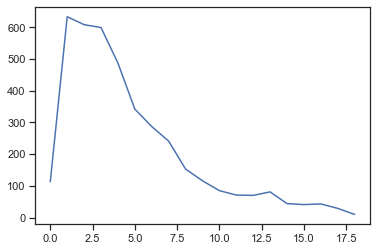

In [174]:
search = pd.read_csv("wikinews_search_trend.csv", skiprows=2)
search["Month"] = [s[:4] for s in search["Month"]]

years = np.unique(search["Month"])

ys = [sum(search["Wikinews: (Worldwide)"][search["Month"] == y]) for y in years]

plt.plot(ys)

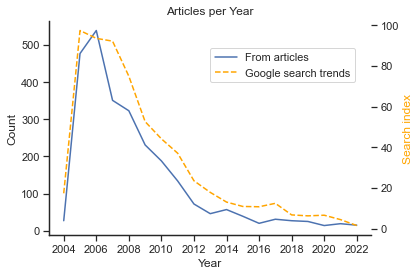

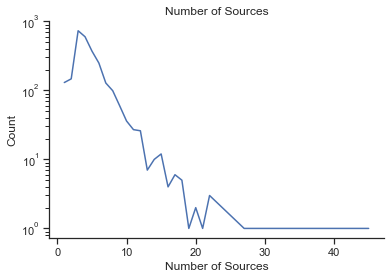

In [205]:

con = sqlite3.connect('wikinews.db')



# wikinews.to_sql("wikinews", con)

cur = con.cursor()

ns, dates = [], []

for row in cur.execute('SELECT COUNT(Title), SUBSTRING(Date, -6, 4) FROM wikinews GROUP BY SUBSTRING(Date, -6, 4) ORDER BY SUBSTRING(Date, -6, 4) asc'):
    n, date = row
    try:
        dates.append(int(date))
        ns.append(n)
    except:
        pass

fig, ax = plt.subplots()
ax.plot(dates, ns, label = "From articles")
ax.set_xticks([2004 + i*2 for i in range(10)])
# ax.title("")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Articles per Year")

ax2 = ax.twinx() 
ax2.plot(dates,np.array(ys)/6.5, label = "Google search trends",ls = '--',color = "orange")
ax2.set_ylabel("Search index",color = "orange")
fig.legend(loc = (0.5,0.7))
sns.despine()
fig.tight_layout()
plt.show()

counts, sources = [], [] 
for row in cur.execute("SELECT count(*), length(Sources) - length(replace(Sources, 'xa0', 'xa')) + 1 FROM wikinews GROUP BY length(Sources) - length(replace(Sources, 'xa0', 'xa'))"):
    c,s = row

    counts.append(c)
    sources.append(s)
    # print(row)

plt.plot(sources,counts)
sns.despine()
plt.xlabel("Number of Sources")
plt.ylabel("Count")
plt.yscale("log")
plt.title("Number of Sources")
plt.show()

In [225]:
# con = sqlite3.connect("fake.db")
# fake.to_sql("fake_news",con)

corr = """
CREATE VIEW modelingOuter AS
    SELECT fake_news.title, fake_news.content, fake_news.meta_description, fake_news.meta_keywords, 
            wikinews.title, wikinews.content
    FROM fake_news
    LEFT OUTER JOIN wikinews 
    
"""



con = sqlite3.connect('wikinews.db')

cur.execute("ATTACH DATABASE 'fake.db' AS fake")

# wikinews.to_sql("wikinews", con)

cur = con.cursor()

for row in cur.execute(corr):
    print(row)

In [226]:
cur.execute("SELECT * FROM modelingOuter")

OperationalError: no such table: main.fake_news